# 1) Autoencoder
>A convolutional autoencoder is a particular flavor of autoencoder where we
use convolutional layers instead of Dense layers. We have previously applied
autoencoders to images using only Dense layers and the result worked fairly
well. However, the local spatial correlations of images imply that we should
Be able to do better using convolutional layers instead of Dense layers.
Build and fit a convolutional autoencoder for the CIFAR10 dataset.
The components of this network will be many of the same pieces we’ve used
with convolutional classification networks: Conv2D, MaxPooling, and so on.
The encoder part of the network should run the input image through a few
convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.
An example to guide your thinking can be found toward the bottom of this
Post https://blog.keras.io/building-autoencoders-in-keras.html.
DO NOT JUST COPY THIS CODE AND TURN IT IN. BE CREATIVE,
COME UP WITH YOUR OWN VARIATION.
After training your network, visualize some examples of input images and
their decoded reconstruction

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
import keras
from keras import layers
tfkl = tfk.layers

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

In [30]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [70]:
'''I tied this and it performed very poorly

input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=tfk.optimizers.Adam(),loss=tfk.losses.BinaryCrossentropy())
autoencoder.summary()
'''

Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_358 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_185 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_359 (Conv2D)          (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_186 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_360 (Conv2D)          (None, 8, 8, 8)           1160      
_________________________________________________________________
conv2d_361 (Conv2D)          (None, 8, 8, 2)         

In [76]:
input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=tfk.optimizers.Adam(),loss=tfk.losses.BinaryCrossentropy())
autoencoder.summary()

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_383 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_196 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_384 (Conv2D)          (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_197 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_385 (Conv2D)          (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_198 (MaxPoolin (None, 4, 4, 8)         

In [77]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
391/391 [==============================] - 166s 424ms/step - loss: 0.6070 - val_loss: 0.5913
Epoch 2/20
391/391 [==============================] - 165s 421ms/step - loss: 0.5880 - val_loss: 0.5864
Epoch 3/20
391/391 [==============================] - 165s 421ms/step - loss: 0.5845 - val_loss: 0.5851
Epoch 4/20
391/391 [==============================] - 165s 422ms/step - loss: 0.5826 - val_loss: 0.5847
Epoch 5/20
391/391 [==============================] - 164s 419ms/step - loss: 0.5815 - val_loss: 0.5815
Epoch 6/20
391/391 [==============================] - 164s 420ms/step - loss: 0.5806 - val_loss: 0.5807
Epoch 7/20
391/391 [==============================] - 164s 420ms/step - loss: 0.5798 - val_loss: 0.5807
Epoch 8/20
391/391 [==============================] - 164s 419ms/step - loss: 0.5792 - val_loss: 0.5795
Epoch 9/20
391/391 [==============================] - 164s 420ms/step - loss: 0.5786 - val_loss: 0.5805
Epoch 10/20
391/391 [==============================] - 164s 420m

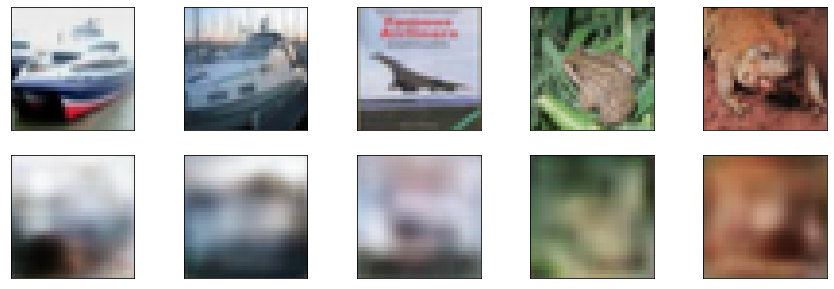

In [78]:
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(15, 5))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2) Image Classification
>We’ll continue to use the CIFAR10 dataset and build a deep convolutional
network for classification.


## 2.1) Deep CNN
>Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network
depth.Train your network end-to-end. Report on your model’s performance
on the training set and test set.

In [79]:
from tensorflow.keras.utils import to_categorical

In [80]:
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

In [81]:
img_shape = (32,32,2)

In [82]:
cnn = tfk.Sequential()
# I used a kernel size of 3x3 and took strides of 1
cnn.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(32, 32, 3)))

# I included max pooling in order to weight important features
cnn.add(tfkl.MaxPool2D(pool_size=(4,4)))
# I also included dropout to prevent overfitting
cnn.add(tfkl.Dropout(.25))

cnn.add(tfkl.Flatten())
cnn.add(tfkl.Dense(10, activation='softmax'))

In [83]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_390 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_199 (MaxPoolin (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 16,586
Trainable params: 16,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = cnn.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1349/1563 [========================>.....] - ETA: 3s - loss: 1.6425

In [ ]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

In [ ]:
plt.stem(model.predict(ds_test.take(1))[9, :]) # pull one batch of images and the ninth image in that batch
# visulaize the prediction of the softmax for this image
plt.xlabel("Digit")
plt.xlabel("Probability")

## 2.2) Transfer Learning
>Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights
should be fixed. You can use whichever pre-trained backbone you like (ResNet,
VGG, etc). Report on your model’s performance on the training set and test
set.

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))
conv_base.trainable = False # make sure the VGG16 is fixed

In [ ]:
model_transfer = tfk.Sequential()
model_transfer.add(conv_base)

# add Dense layers
model_transfer.add(tfkl.GlobalMaxPool2D())
model_transfer.add(tfkl.Dense(150, activation='relu'))
model_transfer.add(tfkl.Dropout(.25))
model_transfer.add(tfkl.Dense(3, activation='softmax'))

In [ ]:
model_transfer.summary()

In [ ]:
model_transfer.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(images, labels, batch_size=32, epochs=5)

In [ ]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

# 3) Text Classification
> While images contain local spatial correlations and structure, many other
datasets contain temporal correlations. Examples include time series and discrete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language. <br>

><b> Background.</b> In this problem, we will build models that read text segments (messages) and identify whether they are SPAM or HAM.<br>

>Wikipedia describes SPAM as “the use of electronic messaging systems to
send unsolicited bulk messages, especially advertising, indiscriminately.” <br>

>The term ‘HAM’ was originally coined by SpamBayes sometime around 2001
and is currently defined and understood to be “E-mail that is generally desired
and isn’t considered SPAM.” <br>

><b> Dataset </b>. The dataset consists of ∼ 5500 messages along with binary labels(SPAM or HAM) and is already preprocessed. So basically each sample is
like [MESSAGE, LABEL].


## 3.1) RNN
> Build and train a Recurrent Neural Network to solve this text classification
task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
spam = pd.read_('/SPAM_detection')
spam.head()

In [ ]:
x = spam['Message']
y = spam['category_val']

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=None,
                filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
    split=' ', char_level=False, oov_token=None)
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)
x = tfk.preprocessing.sequence.pad_sequences(
    x, maxlen=None, dtype='int32', padding='pre', truncating='pre',
    value=0.0)

In [ ]:
y = pd.get_dummies(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)
tot_words = 1+len(tokenizer.word_index)

In [ ]:
rnn = tfk.Sequential()
rnn.add(tfkl.Embedding(tot_words))
rnn.add(tfkl.LSTM(30, return_sequences=True))
rnn.add(tfkl.GlobalMaxPool2D())
rnn.add(tfkl.Dense(20, activation='relu'))
rnn.add(tfkl.Dropout(.25))
rnn.add(tfkl.Dense(1, activation='sigmoid'))
rnn.compile(optimizer=tfk.optimizers.Adam(),loss=tfk.losses.BinaryCrossentropy())
rnn.summary()

In [ ]:
rnn.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=.25)

## 3.2) CNN
> Build and train a 1D CNN for this text classification task. We recommend
you do a character-level convolution (with character embeddings). You might
gain some insight and inspiration from these text classification approaches:<br>
1.http://www.aclweb.org/anthology/D14-1181 <br>
2.https://arxiv.org/abs/1702.08568 <br>
Tips: after splitting every character in each training sample, the maximum
length of training samples can be really big. If you choose to only do the
padding trick to all the samples, it might raise OOM issues. So instead of
padding only, you can also cut each sample at a certain p

In [ ]:
text_cnn = tfk.Sequential()
text_cnn.add(tfkl.Embedding(tot_words))
text_cnn.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu'))
text_cnn.add(tfkl.MaxPool2D(pool_size=(2,2)))
text_cnn.add(tfkl.Dropout(.25))
text_cnn.add(tfkl.Dense(32, activation='relu'))
text_cnn.add(tfkl.Flatten())
text_cnn.add(tfkl.Dense(1, activation='sigmoid'))
text_cnn.summary()

In [ ]:
text_cnn.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.BinaryCrossentropy(),
)

In [ ]:
text_cnn.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=.25)

## 3.3) Compaire
> Be sure to directly compare your two methods with an ROC curve or similar
validation method. Don’t forget to create a train-test split.


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
rnn_y_pred = rnn.predict(x_test)
rnn_fpr, rnn_tpr, _ = roc_curve(y_test, rnn_y_pred)
rnn_auc = (rnn_fpr,rnn_tpr)

In [ ]:
text_cnn_y_pred = text_cnn.predict(x_test)
text_cnn_fpr, text_cnn_tpr, _ = roc_curve(y_test, text_cnn_y_pred)
text_cnn_auc = (text_cnn_fpr,text_cnn_tpr)

In [ ]:
plt.figure()
lw = 2
plt.plot(rnn_fpr[2], rnn_tpr[2], color='darkorange',
         lw=lw, label='RNN (area = %0.2f)' % rnn_auc[2])
plt.plot(text_cnn_fpr[2], text_cnn_tpr[2], color='purple',
         lw=lw, label='CNN (area = %0.2f)' % text_cnn_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()